<a href="https://colab.research.google.com/github/nandita992/Cell_instance_detection/blob/main/Copy_of_r_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Using native R on Google Colab**

Chanin Nantasenamat

<i>Data Professor YouTube channel, http://youtube.com/dataprofessor </i>

In this Jupyter notebook, I will be showing you how to use native R right inside Google Colab.

[Use R on Google Colab!](https://colab.research.google.com/notebook#create=true&language=r)

## Installing libraries

In [ ]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("GEOquery")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.15 (BiocManager 1.30.18), R 4.2.1 (2022-06-23)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'GEOquery'”
Old packages: 'broom', 'devtools', 'dplyr', 'gert', 'gtable', 'rlang',
  'roxygen2', 'rversions', 'tibble', 'tidyverse'



In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Importing libraries

In [ ]:
library(dplyr)

In [ ]:
library(tidyverse)

In [ ]:
library(GEOquery)

In [ ]:
library(ggplot2)

## Read the Data

In [ ]:
# The table has 13181 rows and 61 columns
dat <- read.csv(file = "/content/GSE183947_fpkm.csv")
dim(dat)

[1] 20246    61

In [ ]:
# Get Metadata
# We need to get additional data as which sample/colum is associated with the cancer and which is not.
gse <- getGEO(GEO = 'GSE183947', GSEMatrix = TRUE)
gse

Found 1 file(s)

GSE183947_series_matrix.txt.gz

Using locally cached version: /tmp/RtmpgTx1Ys/GSE183947_series_matrix.txt.gz

Using locally cached version of GPL11154 found here:
/tmp/RtmpgTx1Ys/GPL11154.soft.gz 



$GSE183947_series_matrix.txt.gz
ExpressionSet (storageMode: lockedEnvironment)
assayData: 0 features, 60 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM5574685 GSM5574686 ... GSM5574744 (60 total)
  varLabels: title geo_accession ... tissue:ch1 (41 total)
  varMetadata: labelDescription
featureData: none
experimentData: use 'experimentData(object)'
  pubMedIds: 35046993 
Annotation: GPL11154 


In [ ]:
metadata <- pData(phenoData(gse[[1]]))
head(metadata)

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,⋯,instrument_model,library_selection,library_source,library_strategy,relation,relation.1,supplementary_file_1,donor:ch1,metastasis:ch1,tissue:ch1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GSM5574685,tumor rep1,GSM5574685,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21395376,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143676,NONE,102548,yes,breast tumor
GSM5574686,tumor rep2,GSM5574686,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21395377,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143617,NONE,104338,yes,breast tumor
GSM5574687,tumor rep3,GSM5574687,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21395378,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143618,NONE,105094,yes,breast tumor
GSM5574688,tumor rep4,GSM5574688,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21395379,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143619,NONE,109745,no,breast tumor
GSM5574689,tumor rep5,GSM5574689,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21394912,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143620,NONE,1906415,no,breast tumor
GSM5574690,tumor rep6,GSM5574690,Public on Sep 15 2021,Sep 11 2021,Sep 15 2021,SRA,1,breast,Homo sapiens,tissue: breast tumor,⋯,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosample/SAMN21394913,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX12143621,NONE,1912627,yes,breast tumor


In [ ]:
# It has 60 rows and 4o columns. We only require few columns. 
dim(metadata)

[1] 60 41

In [ ]:
# Subset the data 
metadata.subset<-select(metadata, c(1,10,11,17))
head(metadata.subset)

,title,characteristics_ch1,characteristics_ch1.1,description
,<chr>,<chr>,<chr>,<chr>
GSM5574685,tumor rep1,tissue: breast tumor,metastasis: yes,CA.102548
GSM5574686,tumor rep2,tissue: breast tumor,metastasis: yes,CA.104338
GSM5574687,tumor rep3,tissue: breast tumor,metastasis: yes,CA.105094
GSM5574688,tumor rep4,tissue: breast tumor,metastasis: no,CA.109745
GSM5574689,tumor rep5,tissue: breast tumor,metastasis: no,CA.1906415
GSM5574690,tumor rep6,tissue: breast tumor,metastasis: yes,CA.1912627


In [ ]:
# select, mutate, rename ------------
# we are subsetting the data and also renaming it
metadata.modified <- metadata %>%
  select(1,10,11,17) %>%
  rename(tissue = characteristics_ch1) %>%
  rename(metastasis = characteristics_ch1.1) %>%
  mutate(tissue = gsub("tissue: ", "", tissue)) %>%
  mutate(metastasis = gsub("metastasis: ", "", metastasis))

In [ ]:
head(metadata.modified)

,title,tissue,metastasis,description
,<chr>,<chr>,<chr>,<chr>
GSM5574685,tumor rep1,breast tumor,yes,CA.102548
GSM5574686,tumor rep2,breast tumor,yes,CA.104338
GSM5574687,tumor rep3,breast tumor,yes,CA.105094
GSM5574688,tumor rep4,breast tumor,no,CA.109745
GSM5574689,tumor rep5,breast tumor,no,CA.1906415
GSM5574690,tumor rep6,breast tumor,yes,CA.1912627


In [ ]:
# looking at gene expression data ---------
# As you can see the rows of metadata is the columns of dat data. Thus we would need to re-shape it. 
head(dat)

,X,CA.102548,CA.104338,CA.105094,CA.109745,CA.1906415,CA.1912627,CA.1924346,CA.1926760,CA.1927842,⋯,CAP.2040686,CAP.2046297,CAP.2046641,CAP.348981,CAP.354300,CAP.359448,CAP.94377,CAP.98389,CAP.98475,CAP.99145
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TSPAN6,0.93,1.97,0.00,5.45,4.52,4.75,3.96,3.58,6.41,⋯,6.66,8.35,8.94,6.33,5.94,6.35,3.74,4.84,10.46,4.54
2,TNMD,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,0.39,⋯,0.12,0.17,1.08,0.29,0.00,0.07,9.19,1.18,0.09,0.39
3,DPM1,0.00,0.43,0.00,3.43,8.45,8.53,7.80,7.62,6.40,⋯,4.93,7.47,5.72,4.96,9.28,9.15,4.77,3.75,7.31,2.77
4,SCYL3,5.78,5.17,8.76,4.58,7.20,6.03,9.05,5.37,5.92,⋯,8.02,6.00,5.28,4.98,4.45,7.00,4.14,5.51,7.45,2.33
5,C1orf112,2.83,6.26,3.37,6.24,5.16,13.69,6.69,5.28,7.65,⋯,7.91,4.61,8.35,9.84,7.68,5.62,2.81,7.08,7.28,5.39
6,FGR,4.80,1.83,0.00,4.23,15.87,8.56,13.28,12.27,5.58,⋯,6.99,6.16,13.27,19.33,2.89,40.13,10.53,9.00,4.45,11.42


In [ ]:
# reshaping data - from wide to long--------

dat.long <- dat %>%
  rename(gene = X) %>% # renaming from X column to gene
  gather(key = 'samples', value = 'FPKM', -gene) # gather converts wide format to long format
  #-gene we are excluding gene column as we don't want to touch it
  head(dat.long)

,gene,samples,FPKM
,<chr>,<chr>,<dbl>
1,TSPAN6,CA.102548,0.93
2,TNMD,CA.102548,0.00
3,DPM1,CA.102548,0.00
4,SCYL3,CA.102548,5.78
5,C1orf112,CA.102548,2.83
6,FGR,CA.102548,4.80


In [ ]:
dat.long <- dat.long %>%
  left_join(., metadata.modified, by = c("samples" = "description")) 
  head(dat.long)

,gene,samples,FPKM,title,tissue,metastasis
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,TSPAN6,CA.102548,0.93,tumor rep1,breast tumor,yes
2,TNMD,CA.102548,0.00,tumor rep1,breast tumor,yes
3,DPM1,CA.102548,0.00,tumor rep1,breast tumor,yes
4,SCYL3,CA.102548,5.78,tumor rep1,breast tumor,yes
5,C1orf112,CA.102548,2.83,tumor rep1,breast tumor,yes
6,FGR,CA.102548,4.80,tumor rep1,breast tumor,yes


In [ ]:
# explore data ------
# filter, group_by, summarize and arrange 
dat.long %>%
  filter(gene == 'BRCA1' | gene == 'BRCA2') %>%
  group_by(gene, tissue) %>% # So if gene is getting repeated, we will take a mean of all of them 
  summarize(mean_FPKM = mean(FPKM),
            median_FPKM = median(FPKM)) %>%
  arrange(-mean_FPKM)
  

`summarise()` has grouped output by 'gene'. You can override using the
`.groups` argument.


gene,tissue,mean_FPKM,median_FPKM
<chr>,<chr>,<dbl>,<dbl>
BRCA1,breast tumor,10.042333,6.965
BRCA1,normal breast tissue,7.698667,6.450
BRCA2,normal breast tissue,3.047333,1.250
BRCA2,breast tumor,2.044000,1.600


## Visualiza the Data

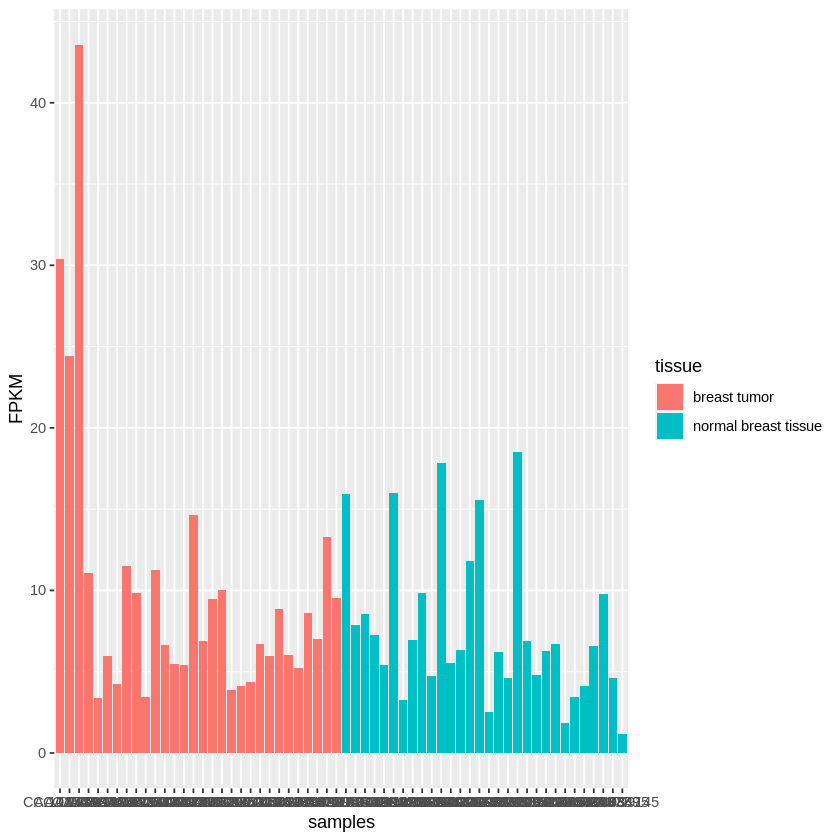

In [ ]:
# 1. barplot
dat.long %>%
  filter(gene == 'BRCA1') %>%
  ggplot(., aes(x = samples, y = FPKM, fill = tissue)) +
  geom_col() 
  # X axis the gene we are intresred in, y is the FPKM normalized values and fill is, which types of tissues are it.
  # As we can see BRAC1 is very much dominant in Breast cancer tissue for few patients vs other. 


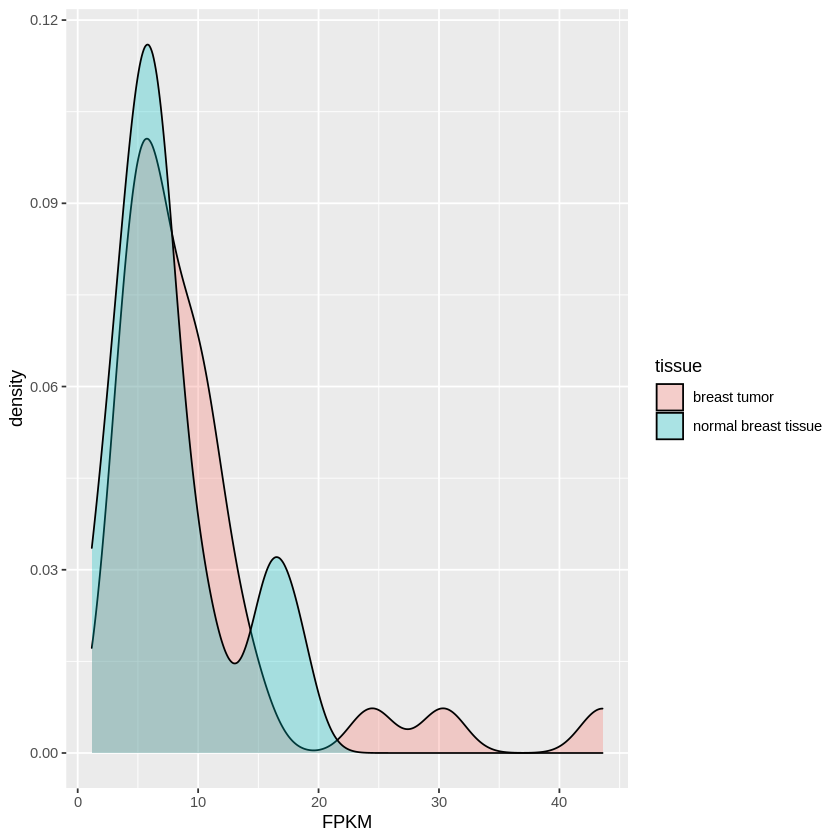

In [ ]:
# 2. density
dat.long %>%
  filter(gene == 'BRCA1') %>%
  ggplot(., aes(x = FPKM, fill = tissue)) +
  geom_density(alpha = 0.3)

  # As we can see, the Brac gene is little bit high in breast tumor 

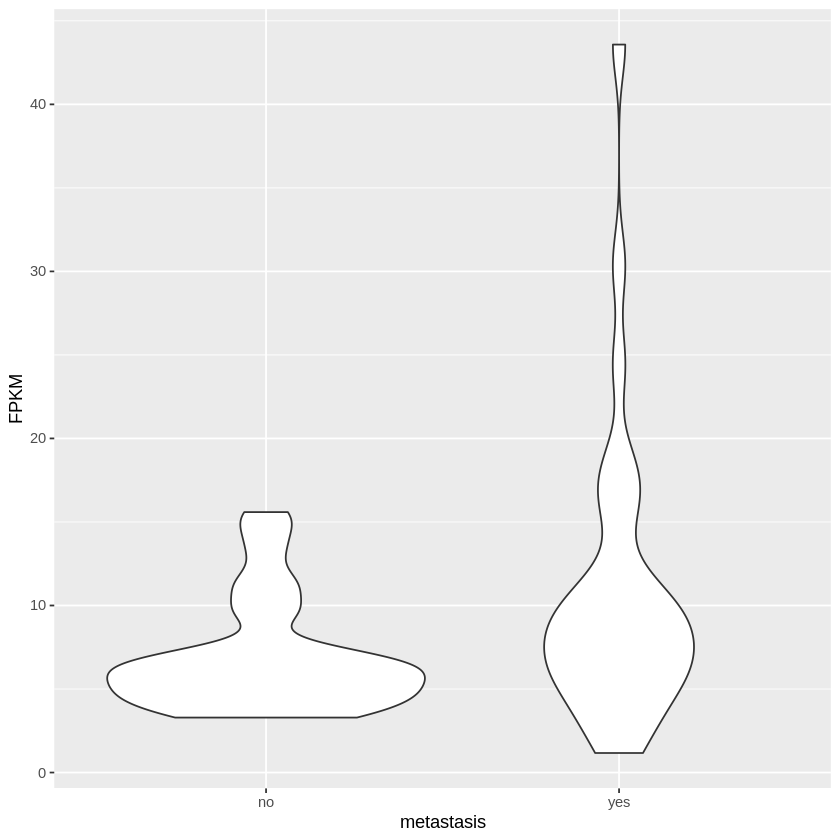

In [ ]:
# 3. boxplot 
dat.long %>%
  filter(gene == 'BRCA1') %>%
  ggplot(., aes(x = metastasis, y = FPKM)) +
  #geom_boxplot()
  geom_violin()

  # BRAC is mestasis